## Introduction to bootstrapping

#### Principles of bootstrapping

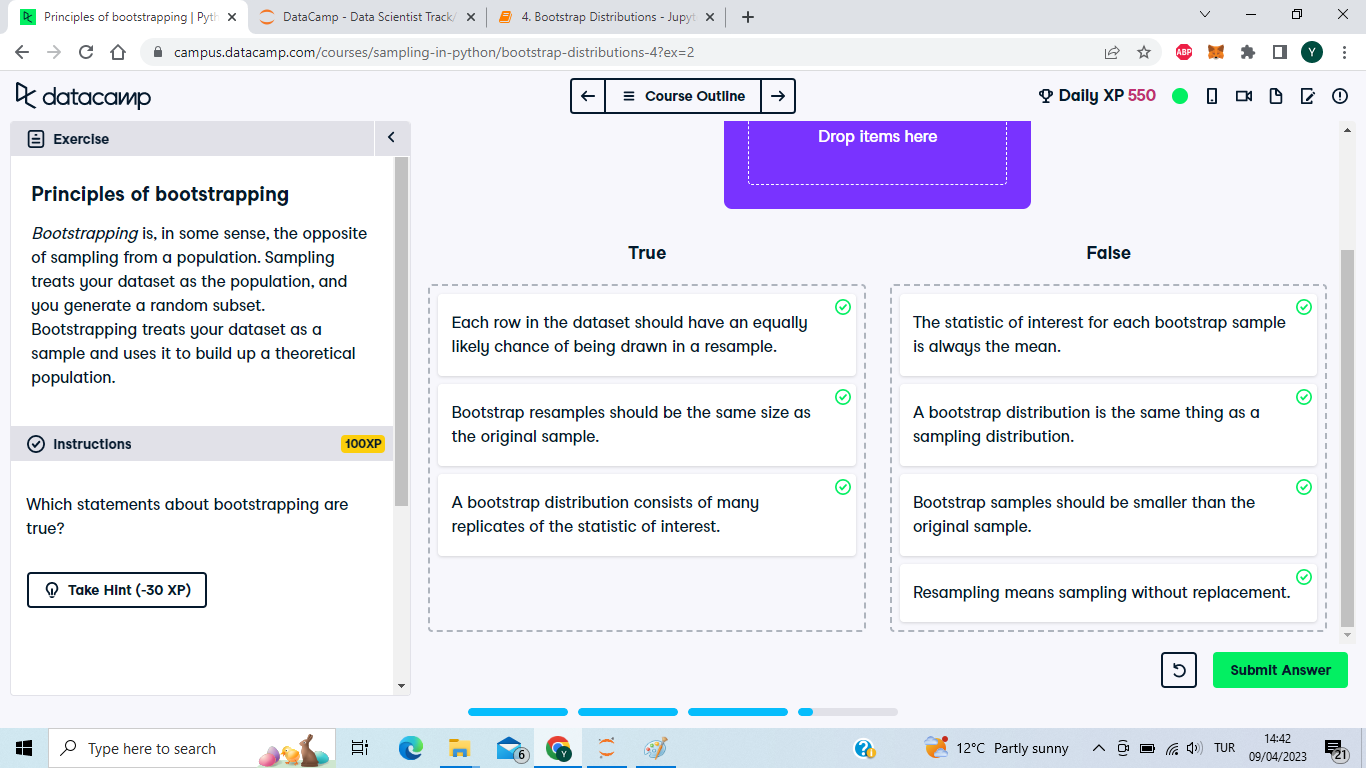

Brilliant bootstrapping! The bootstrapping workflow is to generate a resample of the same size as the population, calculate a summary statistic, then repeat this to get a distribution of summary statistics.

#### With or without replacement?
So far in the course, you've seen sampling with and without replacement. It's important to know when to use each method.

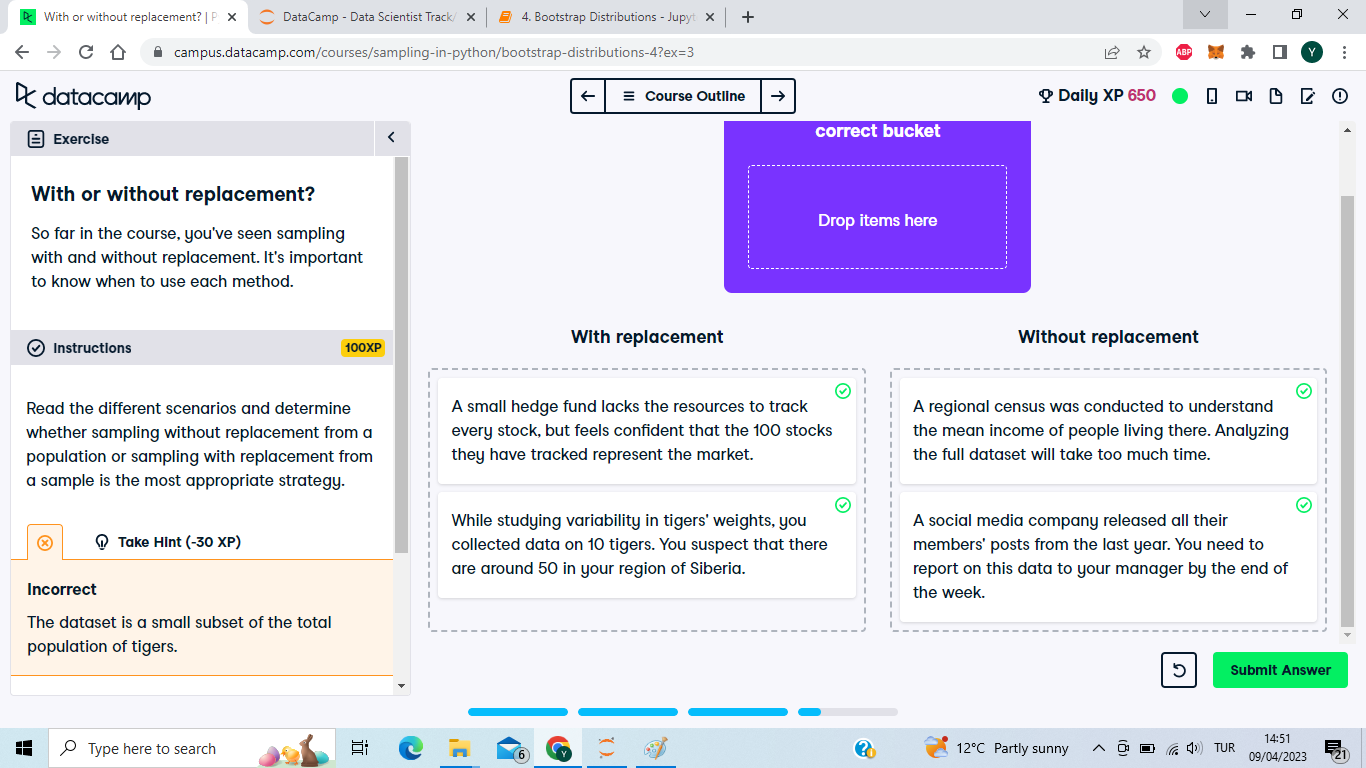

Radical replacement reasoning! The key to deciding whether to sample without or with replacement is whether or not your dataset is best thought of as being the whole population or not.

#### Generating a bootstrap distribution
The process for generating a bootstrap distribution is similar to the process for generating a sampling distribution; only the first step is different.

To make a sampling distribution, you start with the population and sample without replacement. To make a bootstrap distribution, you start with a sample and sample that with replacement. After that, the steps are the same: calculate the summary statistic that you are interested in on that sample/resample, then replicate the process many times. In each case, you can visualize the distribution with a histogram.

Here, spotify_sample is a subset of the spotify_population dataset. To make it easier to see how resampling works, a row index column called 'index' has been added, and only the artist name, song name, and danceability columns have been included.

In [5]:
import pandas as pd
import numpy as np
import random

spotify_population = pd.read_feather("spotify_2000_2020.feather")
spotify_population

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.1100,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.2220,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11.0,0.4000,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11.0,0.3500,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.2790,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41651,0.17300,"['DripReport', 'Tyga']",0.875,163800.0,2.730000,0.443,1.0,4KppkflX7I3vJQk7urOJaS,0.000032,1.0,0.0891,-7.461,1.0,Skechers (feat. Tyga) - Remix,75.0,2020-05-15,0.1430,100.012,0.3060,2020.0
41652,0.01670,"['Leon Bridges', 'Terrace Martin']",0.719,167468.0,2.791133,0.385,0.0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8.0,0.1110,-10.907,1.0,Sweeter (feat. Terrace Martin),64.0,2020-06-08,0.0403,128.000,0.2700,2020.0
41653,0.53800,"['Kygo', 'Oh Wonder']",0.514,180700.0,3.011667,0.539,0.0,52eycxprLhK3lPcRLbQiVk,0.002330,7.0,0.1080,-9.332,1.0,How Would I Know,70.0,2020-05-29,0.1050,123.700,0.1530,2020.0
41654,0.07140,"['Cash Cash', 'Andy Grammer']",0.646,167308.0,2.788467,0.761,0.0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1.0,0.2220,-2.557,1.0,I Found You,70.0,2020-02-28,0.0385,129.916,0.4720,2020.0


In [6]:
spotify_sample = spotify_population[["artists","name","danceability"]].reset_index().sample(frac=1)

# Generate 1 bootstrap resample
spotify_1_resample = spotify_sample.sample(frac = 1, replace = True)

# Print the resample
spotify_1_resample

,index,artists,name,danceability
4918,4918,['Aretha Franklin'],Ain't No Way,0.387
38288,38288,['Me First and the Gimme Gimmes'],Rich Girl,0.473
306,306,['Lotus '],Umbilical Moonrise,0.410
10943,10943,['Kelly Clarkson'],Gone,0.648
40501,40501,['Dance Gavin Dance'],"Strawberry Swisher, Pt. 2",0.382
...,...,...,...,...
5598,5598,['Avenged Sevenfold'],Acid Rain,0.232
8778,8778,"['Joe Budden', 'Busta Rhymes']","Fire (Yes, Yes Y'all)",0.826
24177,24177,['Tame Impala'],Elephant,0.598
29601,29601,['The Alchemist'],Hold You Down,0.756


In [7]:
# Calculate of the danceability column of spotify_1_resample
mean_danceability_1 = np.mean(spotify_1_resample['danceability'])

# Print the result
print(mean_danceability_1)

0.5909741045707748


In [8]:
# Replicate this 1000 times
mean_danceability_1000 = []
for i in range(1000):
	mean_danceability_1000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)['danceability'])
	)
  
# Print the result
print(mean_danceability_1000)

[0.5889563232187389, 0.5911149894372955, 0.5917325499327766, 0.5902950211254042, 0.5913039850201637, 0.5895715215095048, 0.5907423084309587, 0.5915731275206438, 0.5904625552141326, 0.5918329484347996, 0.5912344608219726, 0.5917723617245999, 0.5920930574226938, 0.5920030439792612, 0.5916981755329319, 0.5912979258690274, 0.5914476666026548, 0.5904736724601511, 0.5927178989821333, 0.590625280871899, 0.5919278855386996, 0.5914768652775084, 0.5915895045131501, 0.5920253240829627, 0.5908025662569613, 0.5909628792971017, 0.5931302885538662, 0.589457557134625, 0.5913156784136674, 0.5915184583253313, 0.5922804229882822, 0.5923632777991218, 0.591206772133664, 0.5899374495870935, 0.5904624687920084, 0.5902984251968482, 0.5909913289802153, 0.591172212886498, 0.5922395189168406, 0.5903469704244234, 0.5926554541962762, 0.5904966535433039, 0.5920068633570211, 0.5907653087190299, 0.5920629201075495, 0.5916942145189161, 0.5919481419243374, 0.5928377160553087, 0.592252583061265, 0.591111237276732, 0.590

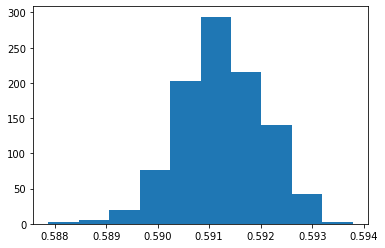

In [9]:
import matplotlib.pyplot as plt
# Draw a histogram of the resample means
plt.hist(mean_danceability_1000)
plt.show()

Beautiful bootstrapping! From the smaller sample of Spotify songs, we can estimate the mean danceability statistic in the population. Since we have a distribution of statistics, we can even quantify how accurate our estimate is.

## Comparing sampling and bootstrap distributions
#### Bootstrap statistics and population statistics

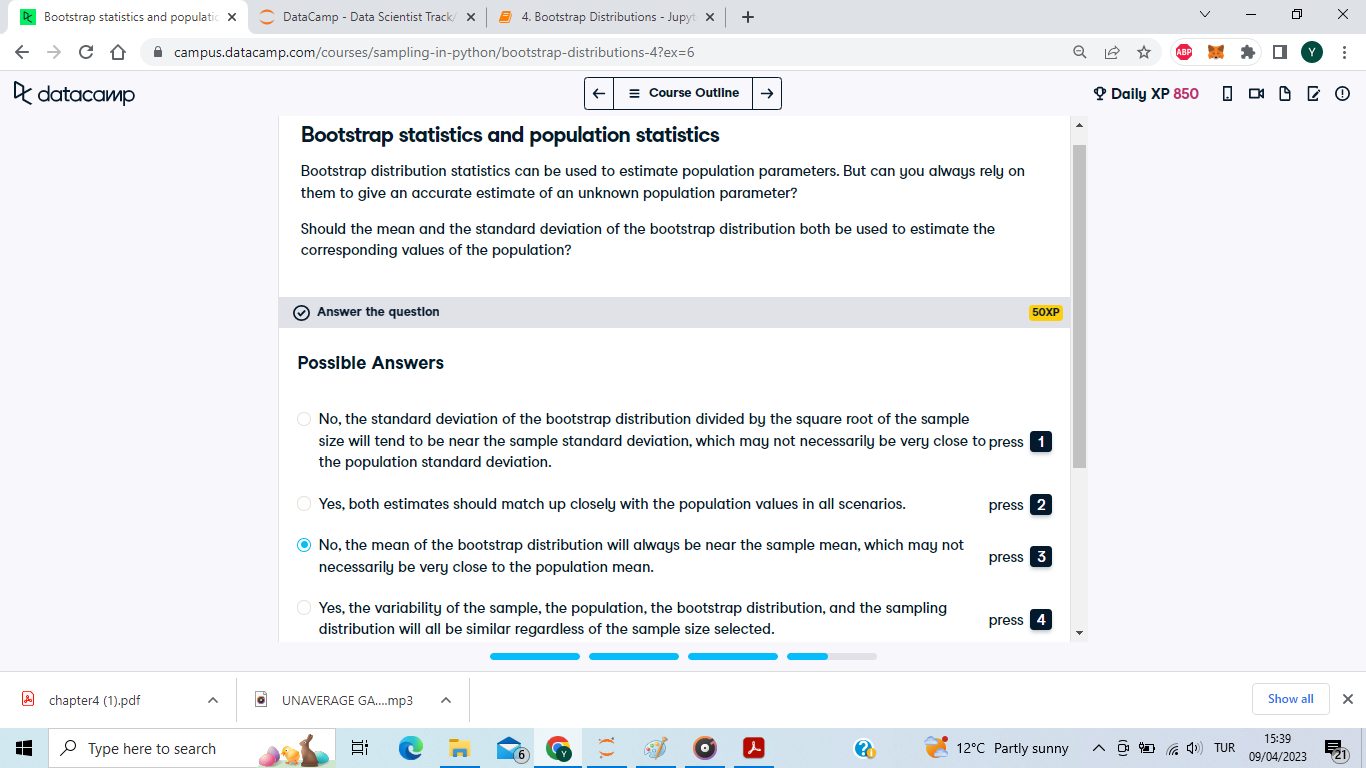

Super standard error reasoning! If the sample is not closely representative of the population, then the mean of the bootstrap distribution will not be representative of the population mean. This is less of a problem for standard errors.

#### Sampling distribution vs. bootstrap distribution
The sampling distribution and bootstrap distribution are closely linked. In situations where you can repeatedly sample from a population (these occasions are rare), it's helpful to generate both the sampling distribution and the bootstrap distribution, one after the other, to see how they are related.

Here, the statistic you are interested in is the mean popularity score of the songs.

spotify_population (the whole dataset) and spotify_sample (500 randomly sampled rows from spotify_population) are available; pandas and numpy are loaded with their usual aliases.

In [10]:
mean_popularity_2000_samp = []

# Generate a sampling distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_samp.append(
    	# Sample 500 rows and calculate the mean popularity 
    	np.mean(spotify_population.reset_index() \
            .sample(n = 500, replace = False)['popularity'])
    )

# Print the sampling distribution results
mean_popularity_2000_samp

[53.584,
 54.388,
 54.842,
 55.014,
 55.452,
 54.582,
 55.262,
 54.524,
 55.222,
 56.116,
 55.414,
 54.422,
 54.08,
 54.436,
 54.728,
 54.896,
 54.97,
 55.178,
 55.366,
 55.308,
 55.016,
 54.55,
 55.506,
 55.238,
 54.7,
 55.346,
 55.38,
 54.34,
 54.98,
 54.23,
 54.608,
 54.774,
 54.926,
 55.012,
 55.002,
 55.734,
 55.156,
 54.06,
 55.052,
 54.636,
 54.594,
 54.546,
 53.64,
 55.108,
 54.452,
 53.922,
 54.752,
 55.188,
 55.376,
 53.938,
 55.388,
 54.484,
 54.558,
 55.412,
 54.8,
 55.592,
 53.834,
 55.188,
 54.312,
 56.7,
 55.514,
 55.198,
 54.49,
 55.35,
 53.764,
 54.126,
 54.524,
 54.56,
 54.868,
 54.43,
 54.92,
 55.17,
 54.862,
 54.702,
 55.178,
 54.532,
 54.806,
 54.798,
 55.374,
 54.804,
 54.988,
 55.24,
 54.74,
 54.886,
 54.556,
 55.194,
 54.652,
 55.262,
 55.028,
 55.384,
 55.55,
 55.59,
 54.932,
 54.212,
 55.528,
 54.542,
 54.2,
 54.804,
 55.256,
 54.484,
 55.406,
 54.314,
 54.102,
 54.508,
 55.002,
 54.768,
 55.008,
 54.768,
 54.156,
 54.528,
 55.6,
 54.67,
 55.222,
 54.8,
 55.21

In [11]:
spotify_sample2 = spotify_population.sample(n = 500)

mean_popularity_2000_boot = []

# Generate a bootstrap distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_boot.append(
    	# Resample 500 rows and calculate the mean popularity     
    	np.mean(spotify_sample2.sample(n=500, replace=True)["popularity"])
    )

# Print the bootstrap distribution results
print(mean_popularity_2000_boot)

[55.658, 55.472, 55.448, 55.384, 55.486, 54.568, 55.23, 54.358, 55.102, 55.75, 54.552, 55.064, 54.898, 54.7, 55.68, 54.992, 55.402, 54.402, 54.246, 55.06, 54.308, 55.06, 54.608, 54.536, 54.542, 54.604, 55.704, 54.56, 54.886, 55.558, 54.412, 54.786, 54.892, 54.878, 54.866, 55.196, 55.272, 54.496, 55.34, 54.584, 54.69, 54.35, 54.348, 55.076, 54.636, 54.974, 55.32, 55.184, 54.666, 54.478, 55.248, 55.024, 55.506, 55.392, 54.964, 55.798, 55.69, 54.546, 54.44, 55.032, 55.488, 55.598, 54.606, 55.844, 55.37, 54.684, 54.98, 55.818, 54.65, 54.798, 54.854, 54.078, 54.792, 54.9, 54.812, 55.334, 54.398, 55.84, 55.562, 54.638, 55.426, 54.99, 55.116, 54.602, 54.434, 55.448, 54.71, 54.042, 54.504, 54.81, 54.812, 55.974, 55.356, 55.028, 54.756, 54.354, 55.462, 54.786, 55.188, 55.204, 54.5, 55.544, 55.11, 54.192, 55.444, 54.486, 55.38, 54.448, 54.314, 54.69, 55.146, 54.096, 54.196, 54.266, 53.926, 54.79, 55.466, 54.688, 55.134, 55.406, 54.52, 55.082, 54.732, 56.124, 54.614, 55.538, 55.138, 55.908, 54.91

Dazzling distributions! The sampling distribution and bootstrap distribution are closely related, and so is the code to generate them.

#### Compare sampling and bootstrap means
To make calculation easier, distributions similar to those calculated from the previous exercise have been included, this time using a sample size of 5000.

spotify_population, spotify_sample, sampling_distribution, and bootstrap_distribution are available; pandas and numpy are loaded with their usual aliases.

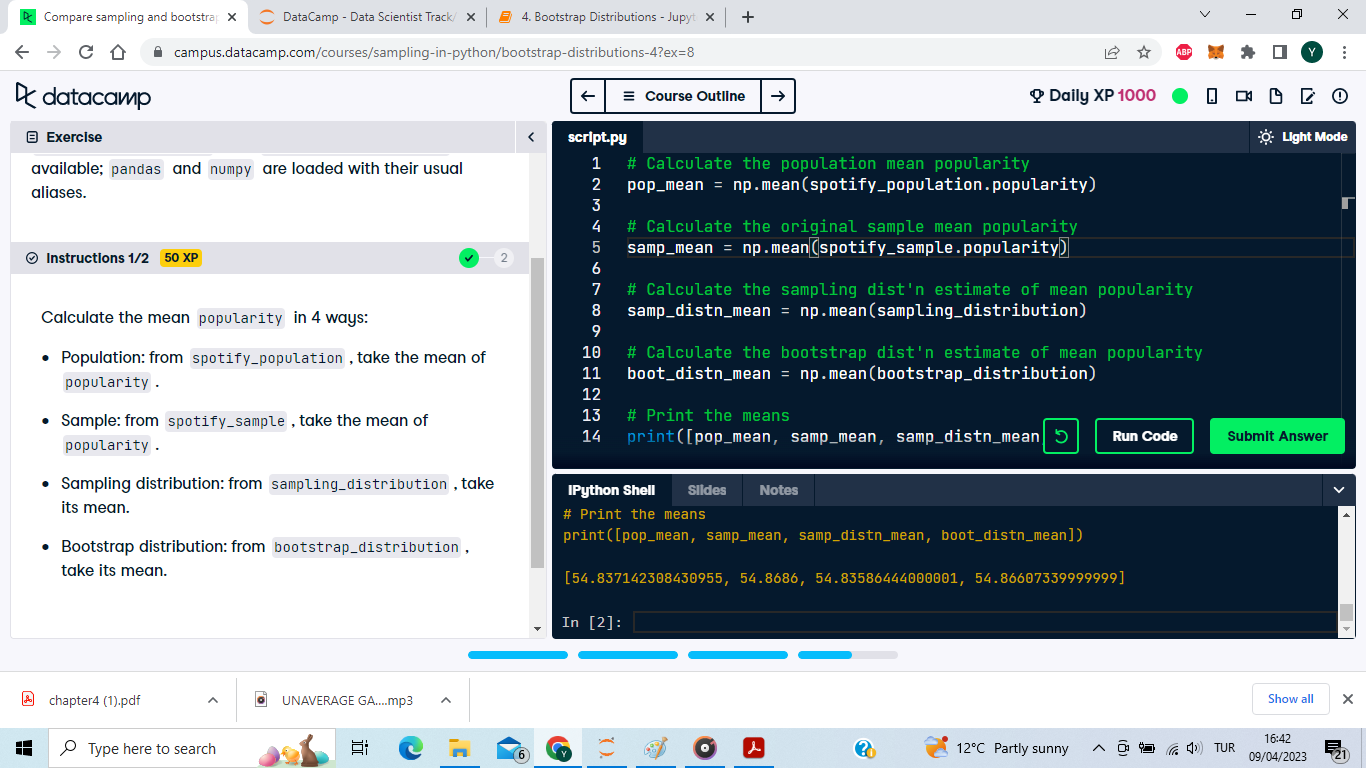

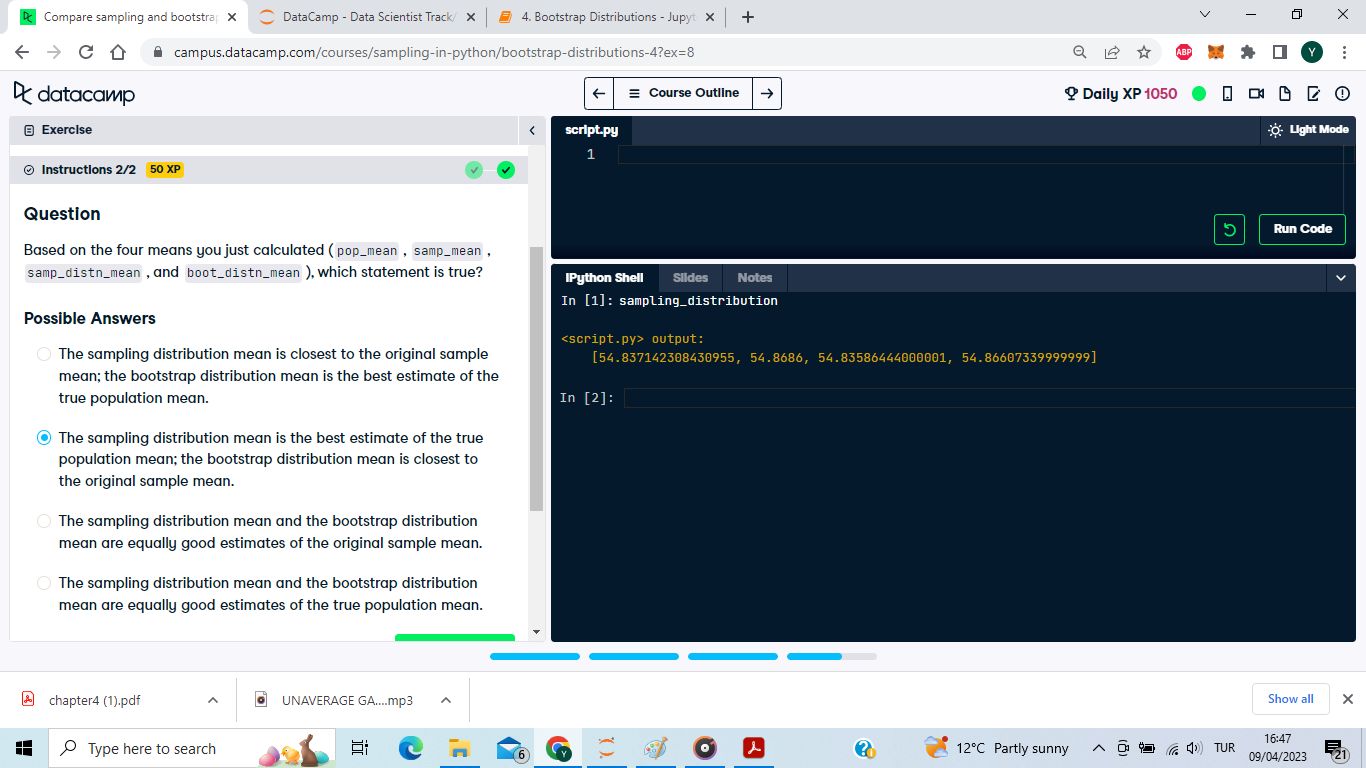

Magnificent means! The sampling distribution mean can be used to estimate the population mean, but that is not the case with the bootstrap distribution.

#### Compare sampling and bootstrap standard deviations

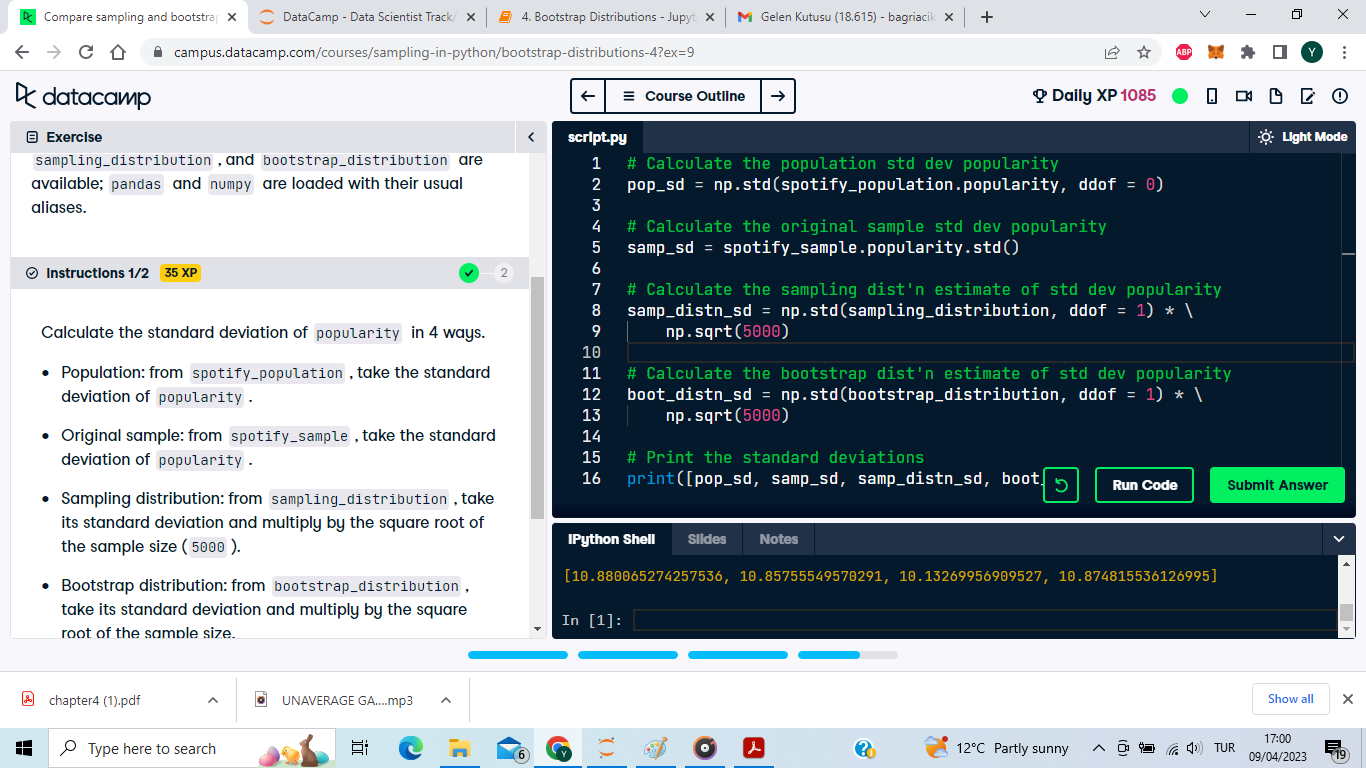

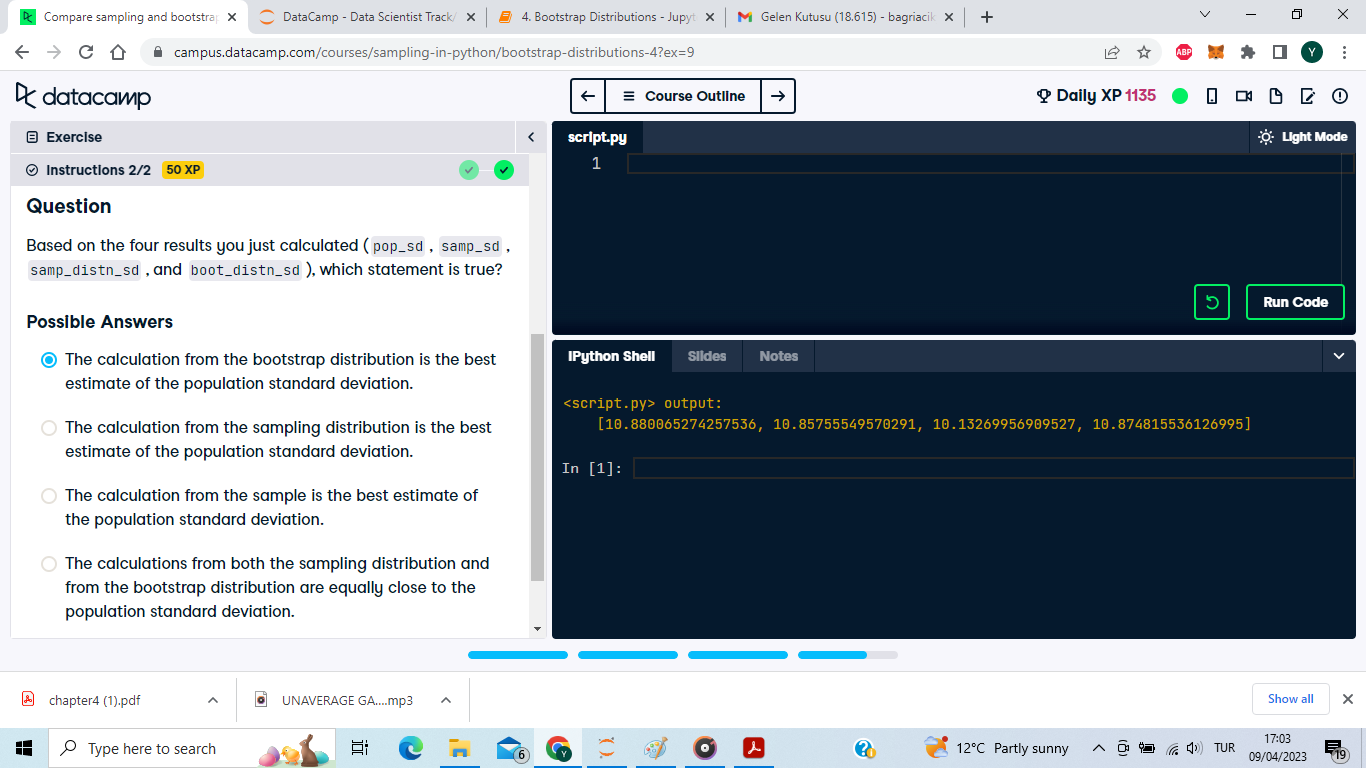

Super standard deviations! This is an important property of the bootstrap distribution. When you don't have all the values from the population or the ability to sample multiple times, you can use bootstrapping to get a good estimate of the population standard deviation.

## Confidence intervals
#### Confidence interval interpretation

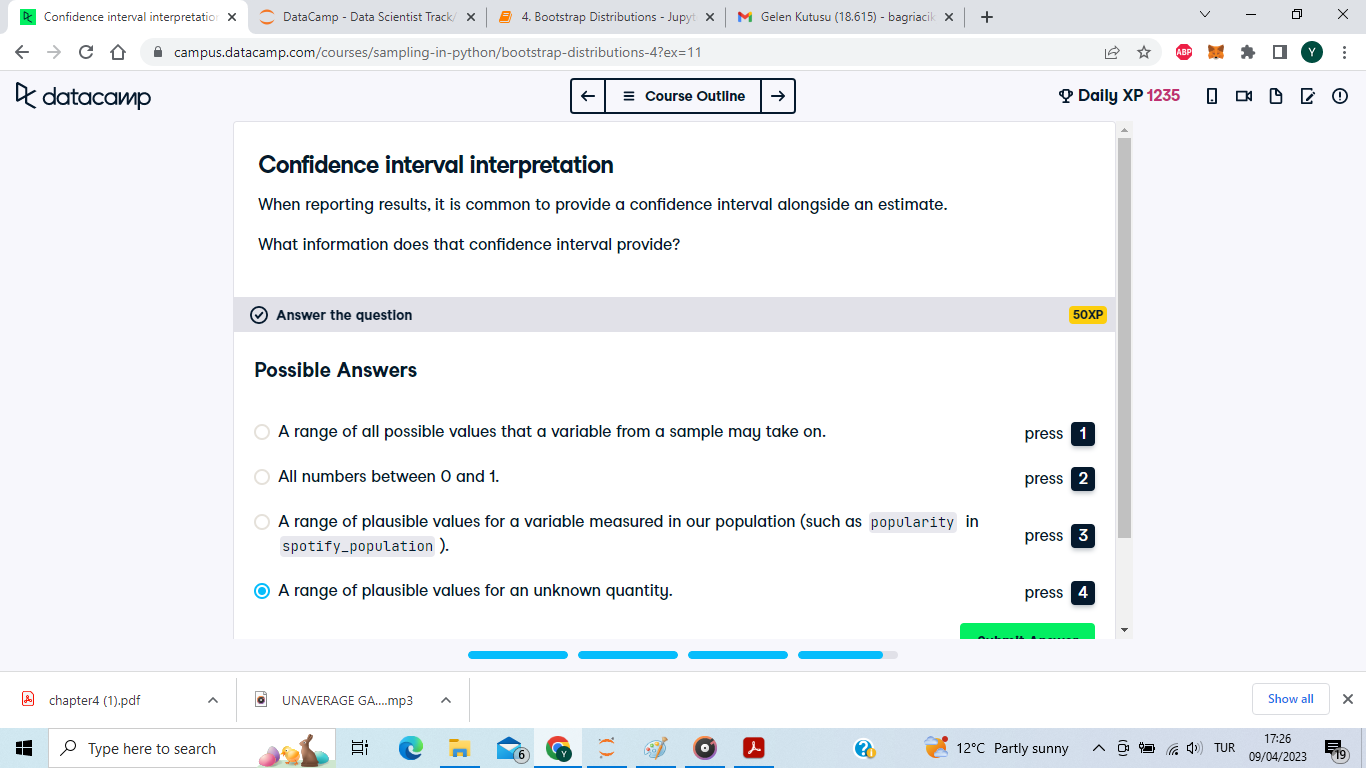

I’m confident you are correct! Confidence intervals account for uncertainty in our estimate of a population parameter by providing a range of possible values. We are confident that the true value lies somewhere in the interval specified by that range.

#### Calculating confidence intervals
You have learned about two methods for calculating confidence intervals: the quantile method and the standard error method. The standard error method involves using the inverse cumulative distribution function (inverse CDF) of the normal distribution to calculate confidence intervals. In this exercise, you'll perform these two methods on the Spotify data.

spotify_population, spotify_sample, and bootstrap_distribution are available; pandas and numpy are loaded with their usual aliases, and norm has been loaded from scipy.stats.

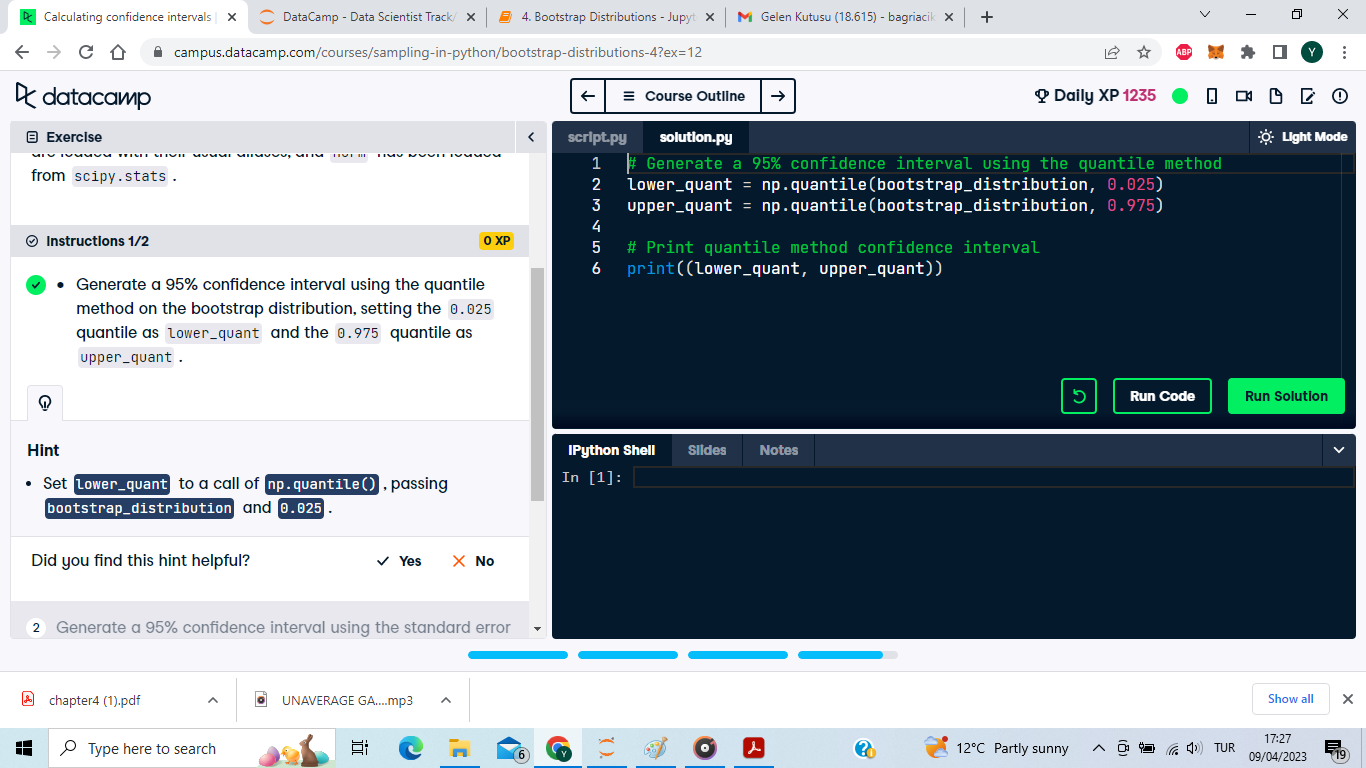

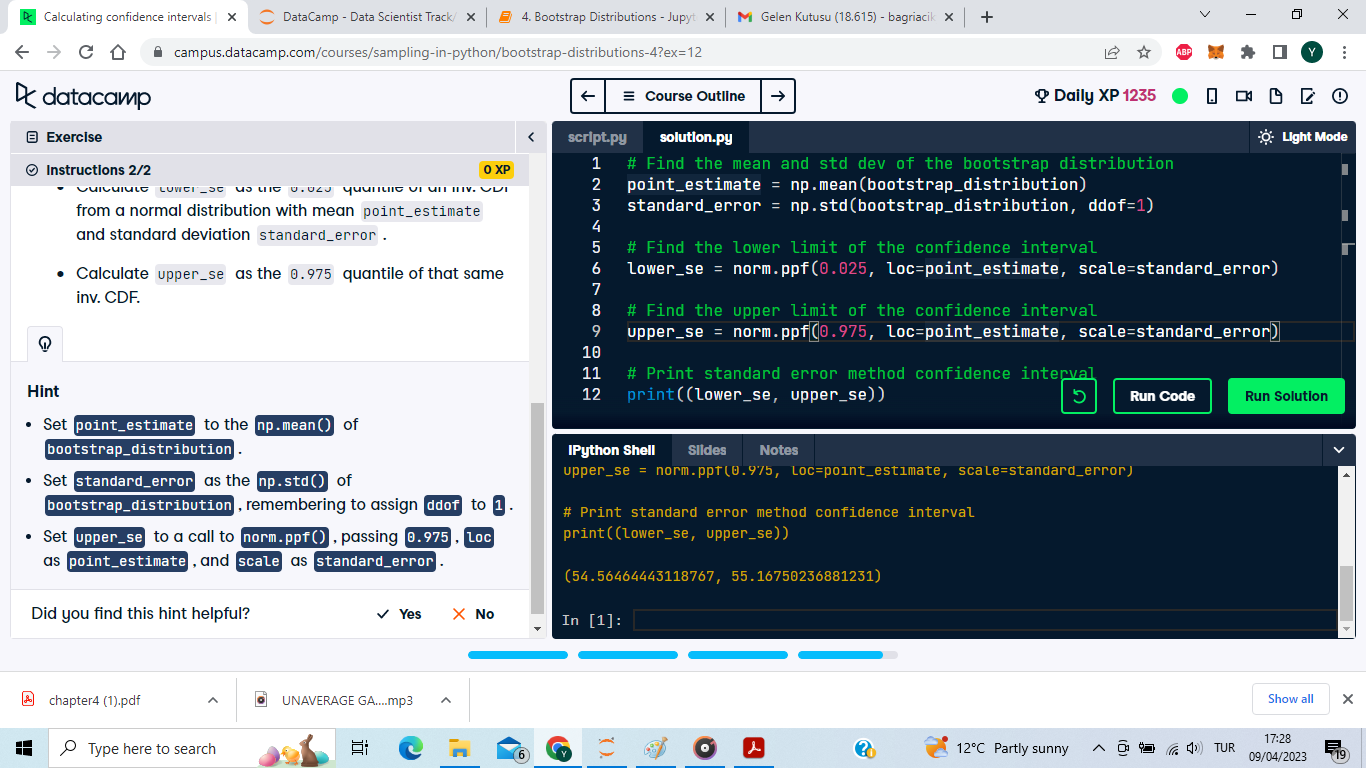

Standard excellence! The standard error method for calculating the confidence interval assumes that the bootstrap distribution is normal. This assumption should hold if the sample size and number of replicates are sufficiently large.